In [9]:
import pandas as pd 
import numpy as np

car_data = pd.read_csv('/Users/baffoebonnieja/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/DATASCIENCE/Vehicle_Price.csv')

car_data.isnull().sum()

car_cleaned = car_data.dropna()


In [11]:
car_cleaned.isnull().sum()

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

df = pd.DataFrame(car_cleaned)

X = df[['make','model','year','mileage','engine','cylinders','fuel','transmission','trim','body','doors','drivetrain']]
y = df['price']

X_encoded = pd.get_dummies(X) #handles categorical vars

#X train: training set features / Y train: training set targets / X test: test set features / Y pred: model predictions  Y test: actual vals
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
#scaling  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #test: no fit

#train model only on training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#pred /testing
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
mse

3.730612533355572e+35

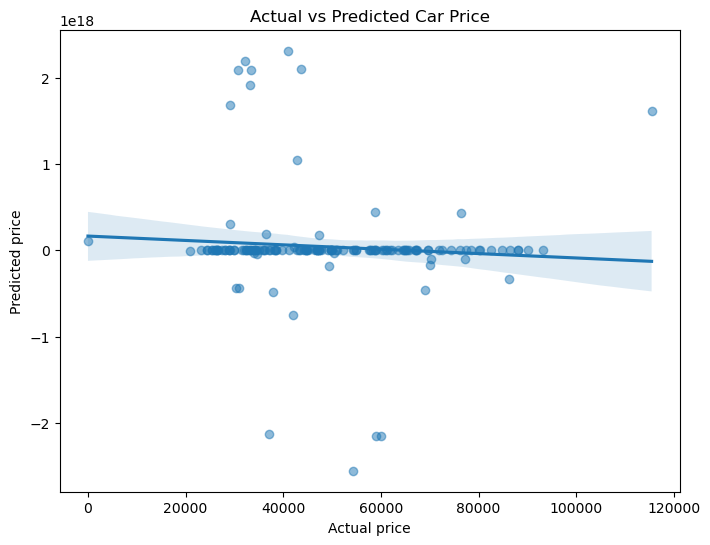

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Car Price")
plt.show()

In [17]:
print(np.unique(y_pred))

[-2.55378727e+18 -2.15084281e+18 -2.15084281e+18 -2.12796079e+18
 -7.53095531e+17 -4.79655994e+17 -4.60993589e+17 -4.36333915e+17
 -4.36333915e+17 -3.28586928e+17 -1.81787862e+17 -1.68156696e+17
 -1.00929264e+17 -4.02555320e+16 -3.39852649e+16 -3.39517202e+16
 -6.85318235e+15  2.11131780e+04  2.38731780e+04  2.42171780e+04
  2.42971780e+04  2.45371780e+04  2.64651780e+04  2.73691780e+04
  2.74971780e+04  2.75851780e+04  2.78611780e+04  2.80971780e+04
  2.81131780e+04  2.93371780e+04  3.04011780e+04  3.04851780e+04
  3.06571780e+04  3.09931780e+04  3.11211780e+04  3.15211780e+04
  3.19611780e+04  3.19851780e+04  3.24491780e+04  3.29291780e+04
  3.33051780e+04  3.51691780e+04  3.56251780e+04  3.58331780e+04
  3.74091780e+04  3.82571780e+04  3.83051780e+04  3.86411780e+04
  3.87851780e+04  3.94491780e+04  4.08331780e+04  4.14571780e+04
  4.19211780e+04  4.21534280e+04  4.31851780e+04  4.38411780e+04
  4.39051780e+04  4.48171780e+04  4.61451780e+04  4.63471780e+04
  4.65851780e+04  4.72171

In [19]:
print(y_test) #correct values

688    30870.0
492    54949.0
181    34330.0
339    51083.0
406    44604.0
        ...   
636    40980.0
126    27998.0
540    29066.0
923    88135.0
98     65315.0
Name: price, Length: 150, dtype: float64


In [ ]:
#y_test = y_test.values.ravel() #reduces dimesions if needed

In [35]:
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

print(coef_df.head(10))  # top positive
print(coef_df.tail(10))  # top negative


                                               Feature   Coefficient
163                   engine_16V PDI DOHC Turbo Hybrid  2.111270e+17
204  engine_II 3.8L V-6 gasoline direct injection, ...  1.849000e+17
115                               model_Silverado 2500  1.768353e+17
114                               model_Silverado 1500  1.761132e+17
315                                            trim_EX  1.731671e+17
292                                      trim_2.5T XRT  1.675595e+17
43                    model_C40 Recharge Pure Electric  1.612579e+17
429                                             trim_i  1.595862e+17
187  engine_6 DOHC, VVT variable valve control, eng...  1.526244e+17
106                                          model_SQ5  1.434194e+17
                                               Feature   Coefficient
254     transmission_8-Speed Automatic with Auto-Shift -1.548546e+17
121                                model_Sprinter 2500 -1.559766e+17
15                                

In [59]:
# ========== NEW DATA PREDICTION ==========

# Start with a sample input (must match the shape of X_encoded)

sample_input = X_train.iloc[0].copy() #copy first row of training set for manipulation
#sample_input['year'] = 2024
sample_input['mileage'] = 50

sample_input_scaled = scaler.transform([sample_input])
predicted_price = model.predict(sample_input_scaled)

print(f"Predicted price: ${predicted_price[0]:,.2f}")

                


Predicted price: $32,297.18


/Users/baffoebonnieja/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
# price v mileage plot

import matplotlib.pyplot as plt

mileages = list(range(0, 200000, 5000))
predictions = []

for m in mileages:
    sample = sample_input.copy()
    sample['mileage'] = m
    sample_scaled = scaler.transform([sample])
    price = model.predict(sample_scaled)[0]
    predictions.append(price)

plt.plot(mileages, predictions)
plt.xlabel("Mileage")
plt.ylabel("Predicted Price")
plt.title("Price Drop as Mileage Increases")
plt.grid(True)
plt.show()


In [66]:
X_train

,year,mileage,cylinders,doors,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,...,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_All-wheel Drive,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
798,2024,12.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
178,2023,32.0,6.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
60,2024,5.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
99,2024,8.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
908,2024,6.0,4.0,4.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2024,0.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
148,2024,11.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
364,2024,1.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
595,2024,15.0,4.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [64]:
X_train_scaled 

array([[ 0.31305572, -0.11200733, -0.72071453, ..., -0.78842985,
         2.44473806, -0.25264558],
       [-2.87056179, -0.07743094,  0.67873116, ..., -0.78842985,
        -0.40904178, -0.25264558],
       [ 0.31305572, -0.12410907, -0.72071453, ..., -0.78842985,
        -0.40904178, -0.25264558],
       ...,
       [ 0.31305572, -0.13102435, -0.72071453, ..., -0.78842985,
        -0.40904178, -0.25264558],
       [ 0.31305572, -0.10682088, -0.72071453, ..., -0.78842985,
        -0.40904178, -0.25264558],
       [ 0.31305572, -0.1085497 , -0.72071453, ..., -0.78842985,
        -0.40904178, -0.25264558]])

In [84]:
variances = np.var(X_train_scaled, axis=0)
print(variances)
print(variances.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [108]:
variances = X_train_scaled.var(axis=0)  #vars of each feature/columns
zero_var_indices = np.where(variances == 0) #grabs indices of 0 var cols   [0]?
zero_var_indices

(array([ 40,  79,  94, 100, 106, 118, 142, 178, 189, 201, 220, 226, 227,
        240, 253, 262, 280, 295, 316, 317, 350, 359, 377, 379, 380, 388,
        389, 397, 403, 428, 431]),)

In [110]:
zero_var_cols = X_train.columns[zero_var_indices]
zero_var_cols  
##Even though you're using the scaled data to check variances, you still want the original column names, which are stored in X_train.columns.

Index(['model_Blazer', 'model_Impreza', 'model_Pathfinder', 'model_QX55',
       'model_SQ5', 'model_Soul', 'model_X3', 'engine_32V GDI DOHC Twin Turbo',
       'engine_6 gasoline direct injection, DOHC, variable valve control',
       'engine_DOHC, D-CVVT variable valve control, regular unleaded, en',
       'engine_ne 3L I-6 gasoline direct injection, DOHC, variable valve',
       'engine_oled Turbo Premium Unleaded I-4 2.0 L/122',
       'engine_oled Turbo Premium Unleaded V-6 3.0 L/183',
       'transmission_10-Speed Automatic with Overdrive',
       'transmission_8-Speed Automatic Sport',
       'transmission_9-speed automatic', 'trim_144 WB Standard Roof Passenger',
       'trim_3LT', 'trim_EX-L', 'trim_Essence', 'trim_M60i',
       'trim_Premium 55 TFSI e S line quattro S tronic', 'trim_SENSORY',
       'trim_SL 4WD', 'trim_SLE', 'trim_SX', 'trim_SX Touring',
       'trim_Series II Carbide 4x4', 'trim_Standard Roof', 'trim_ZR2',
       'trim_sDrive30i'],
      dtype='object')

In [112]:
X_train_filtered = X_train.drop(columns=zero_var_cols) #update data to exclude columns with 0 var
X_test_filtered = X_test.drop(columns=zero_var_cols)

scaler = StandardScaler()  #scale updated data
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mse

4.472604829999781e+35

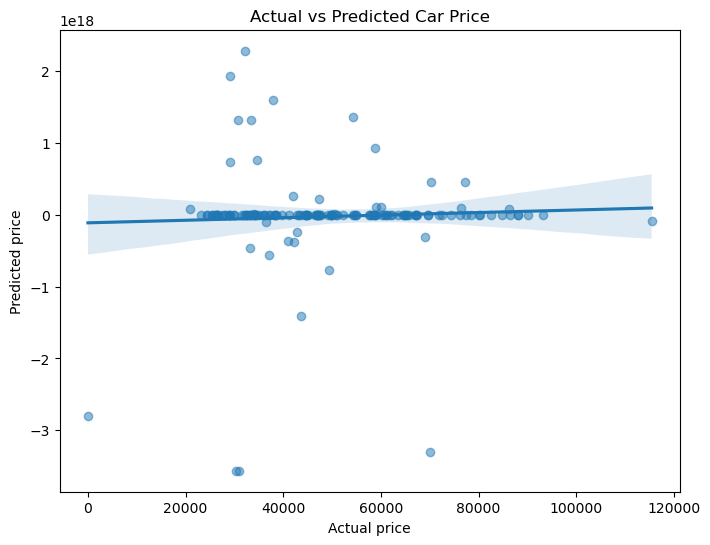

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Car Price")
plt.show()

In [ ]:
# pip install ucimlrepo

# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# adult = fetch_ucirepo(id=2) 
  
# # data (as pandas dataframes) 
# X = adult.data.features 
# y = adult.data.targets 
  
# # variable information 
# print(adult.variables) ***


# X.isnull().sum()